#Objective

The goal of this assignment is to implement and evaluate the K-Nearest Neighbours (KNN) algorithm for classifying animal types. We will preprocess the dataset, train a KNN model, choose the best hyperparameters, and assess its performance using standard metrics.

#Introduction

K-Nearest Neighbours is a simple yet powerful instance-based learning algorithm that classifies data points based on the majority class of their closest neighbors. It is widely used for classification problems where decision boundaries are nonlinear. The performance of KNN depends on choosing the right K value and distance metric.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [ ]:
# Load dataset
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Dataset info
print("\nDataset Info:")
print(df.info())

# Shape of dataset
print("\nShape of dataset:", df.shape)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

Sh

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
# Basic statistics
print("\nSummary statistics:")
print(df.describe(include="all"))


Summary statistics:
       animal name        hair    feathers        eggs        milk  \
count          101  101.000000  101.000000  101.000000  101.000000   
unique         100         NaN         NaN         NaN         NaN   
top           frog         NaN         NaN         NaN         NaN   
freq             2         NaN         NaN         NaN         NaN   
mean           NaN    0.425743    0.198020    0.584158    0.405941   
std            NaN    0.496921    0.400495    0.495325    0.493522   
min            NaN    0.000000    0.000000    0.000000    0.000000   
25%            NaN    0.000000    0.000000    0.000000    0.000000   
50%            NaN    0.000000    0.000000    1.000000    0.000000   
75%            NaN    1.000000    0.000000    1.000000    1.000000   
max            NaN    1.000000    1.000000    1.000000    1.000000   

          airborne     aquatic    predator     toothed    backbone  \
count   101.000000  101.000000  101.000000  101.000000  101.000000  

/tmp/ipython-input-258527553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set2")


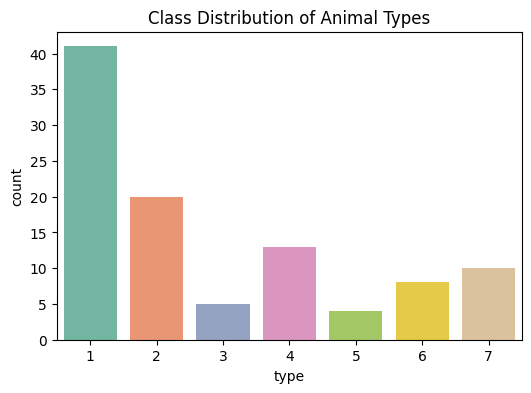

In [ ]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Class Distribution of Animal Types")
plt.show()


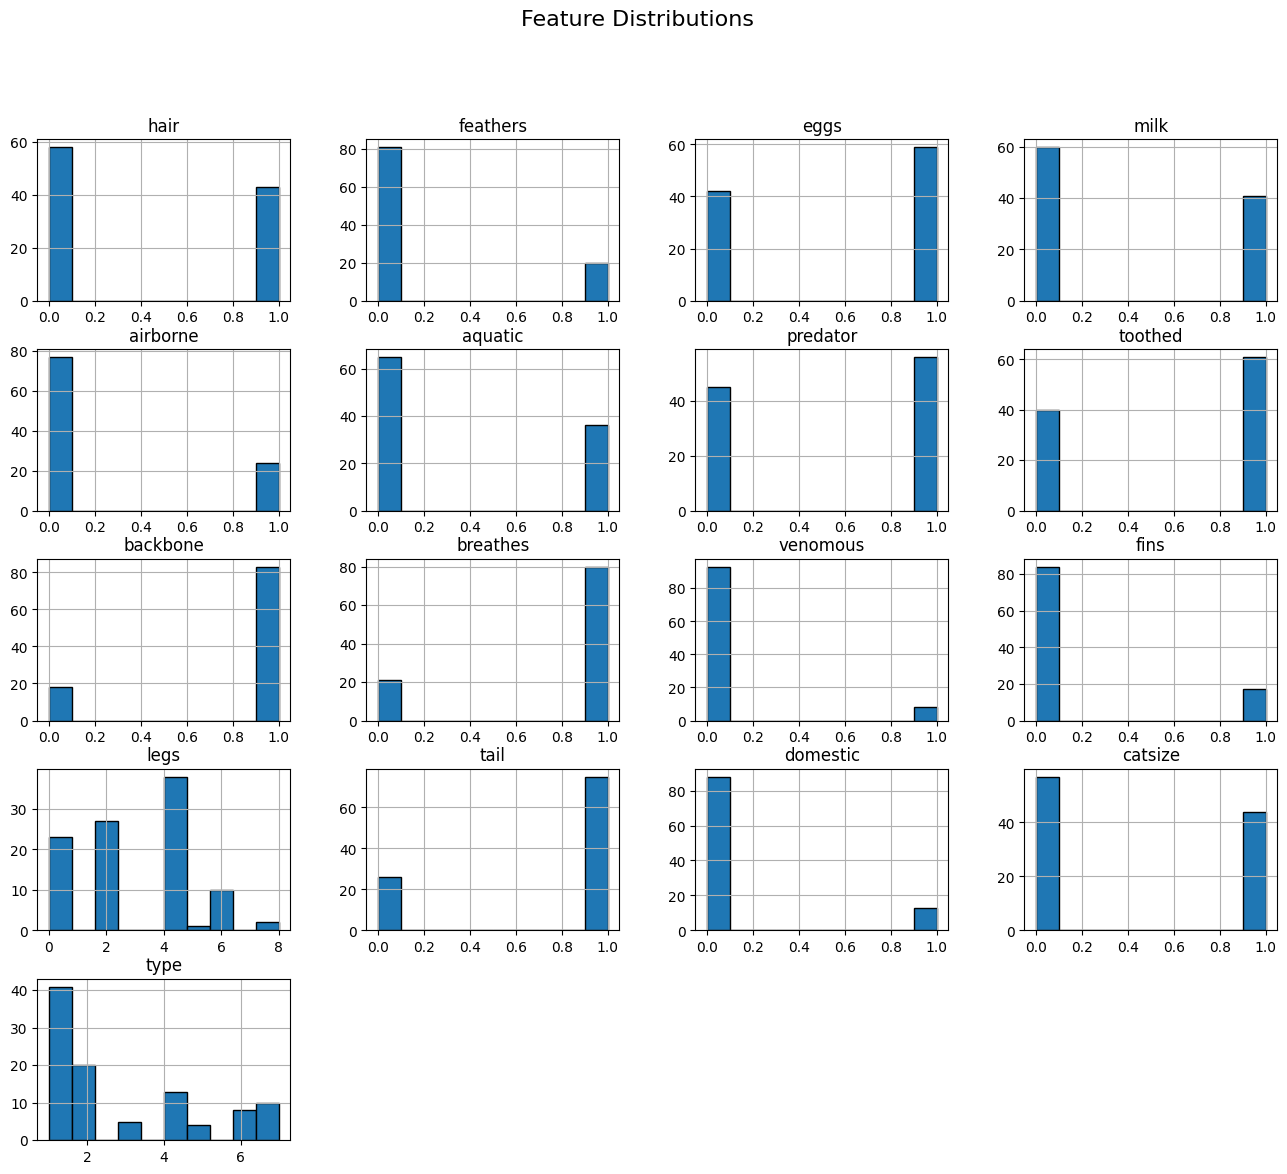

In [ ]:
# Histograms for numerical features
df.drop(columns=["animal name"]).hist(figsize=(16,13), bins=10, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

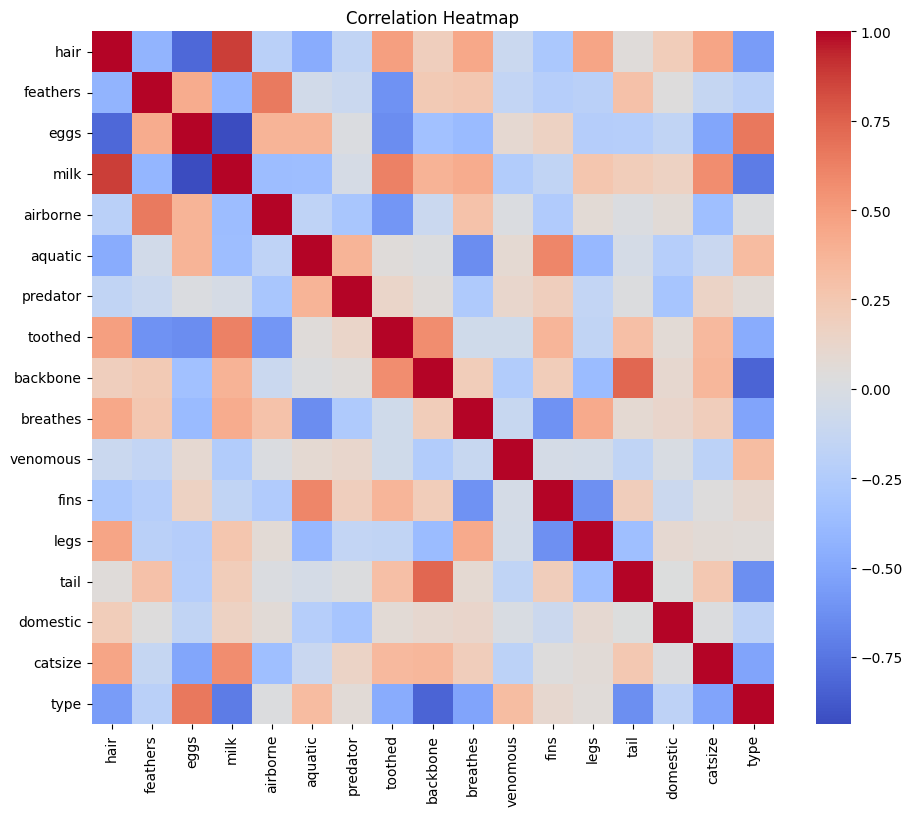

In [ ]:
# Correlation heatmap
plt.figure(figsize=(11,9))
sns.heatmap(df.drop(columns=["animal name"]).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

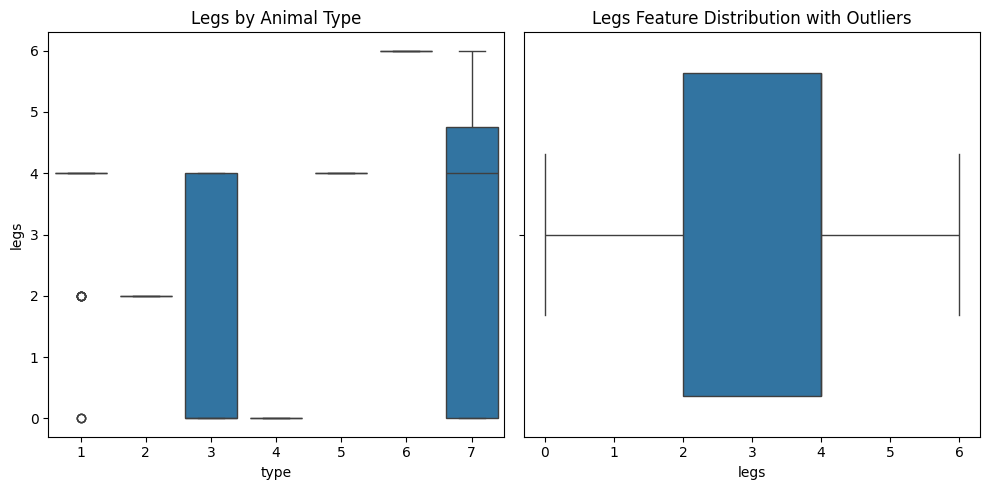

In [ ]:
# Boxplot for legs (to check outliers)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="type", y="legs", data=df)
plt.title("Legs by Animal Type")
plt.subplot(1, 2, 2)
sns.boxplot(x=df['legs'])
plt.title("Legs Feature Distribution with Outliers")
plt.tight_layout()
plt.show()

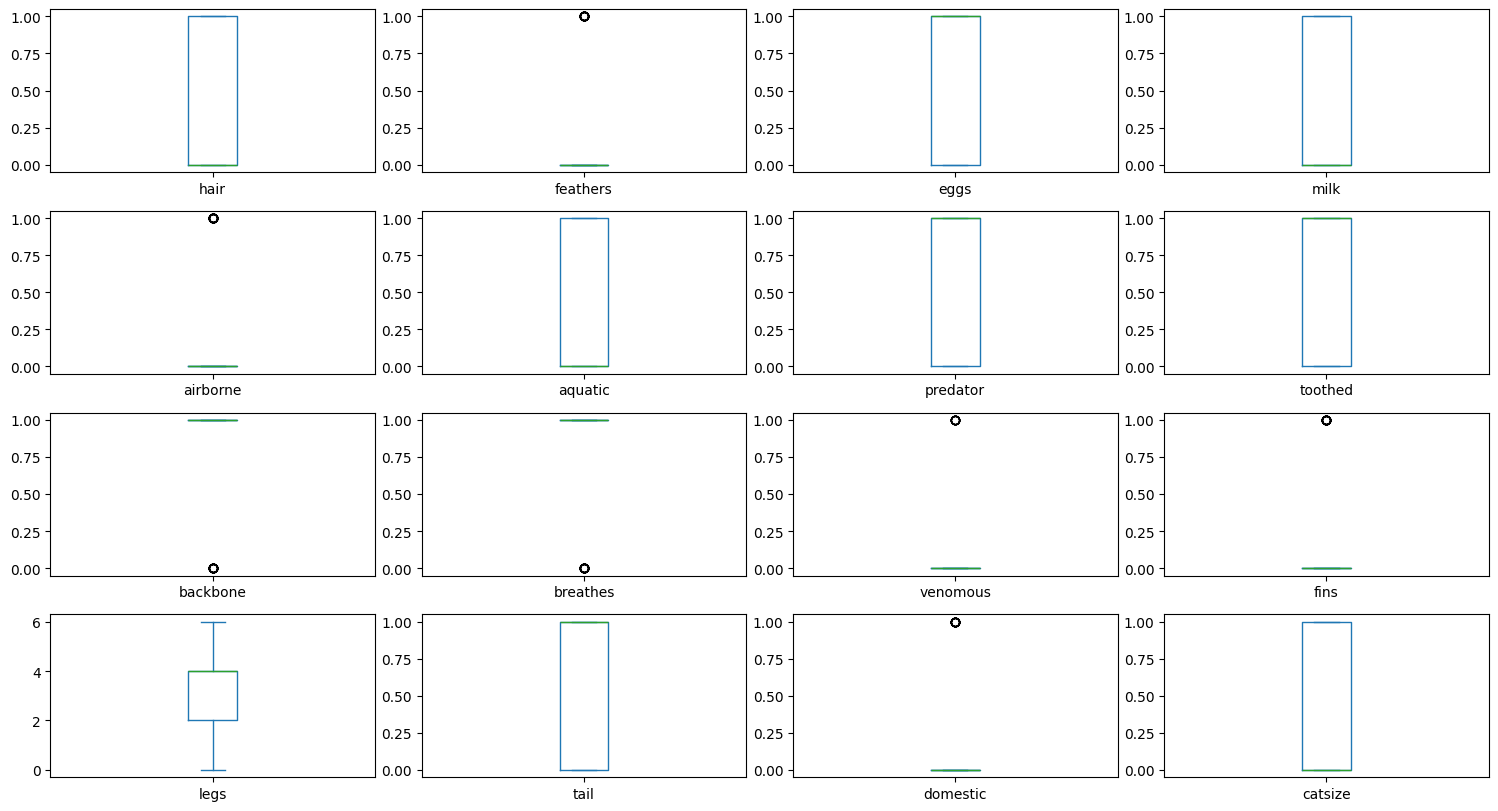

In [ ]:
# Outlier Detection with Boxplots
df.drop(columns=["type"]).plot(kind="box", subplots=True, layout=(5,4), figsize=(15,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
# Drop unnecessary column
X = df.drop(columns=["animal name", "type"])
y = df["type"]

# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Handle outliers: For 'legs' (replace values > 6 with median)
df.loc[df['legs'] > 6, 'legs'] = df['legs'].median()

###Task 3: Train-Test Split

In [ ]:
# Split dataset: 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 16)
X_test shape: (21, 16)
y_train shape: (80,)
y_test shape: (21,)


##Task 4: Implement KNN Model

In [ ]:
# Initial KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



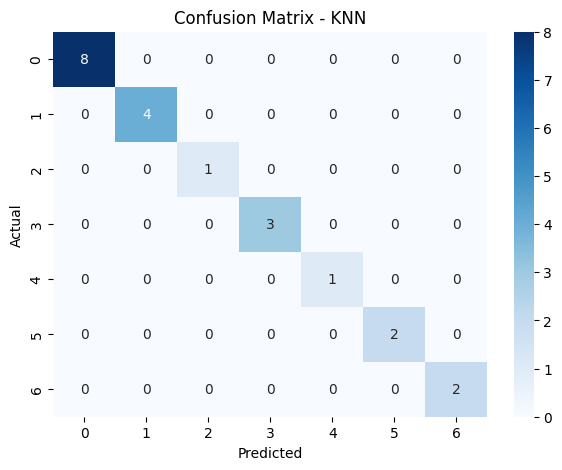

In [ ]:
# Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Task 5: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search for best K and metric
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}


In [ ]:
# Best model
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned Report:\n", classification_report(y_test, y_pred_best))


Tuned Accuracy: 1.0

Tuned Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# Decision Boundary (2D PCA)

In [ ]:
# 8. Decision Boundary (2D PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

knn_pca = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                               metric=grid.best_params_['metric'])
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

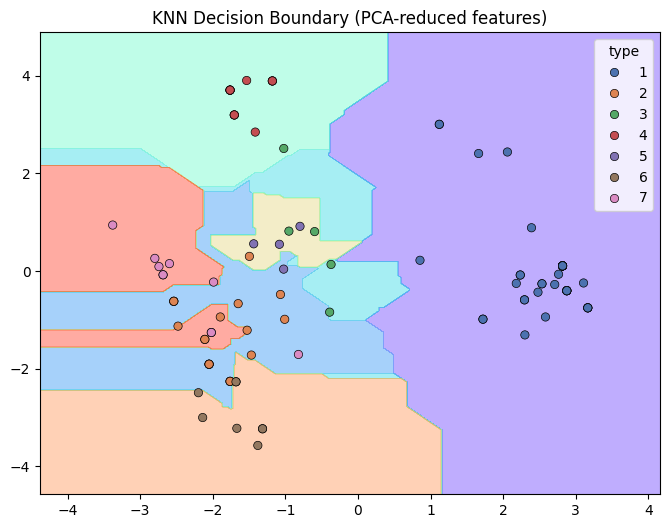

In [ ]:
# Plot decision boundary
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="rainbow")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="deep", edgecolor="k")
plt.title("KNN Decision Boundary (PCA-reduced features)")
plt.show()

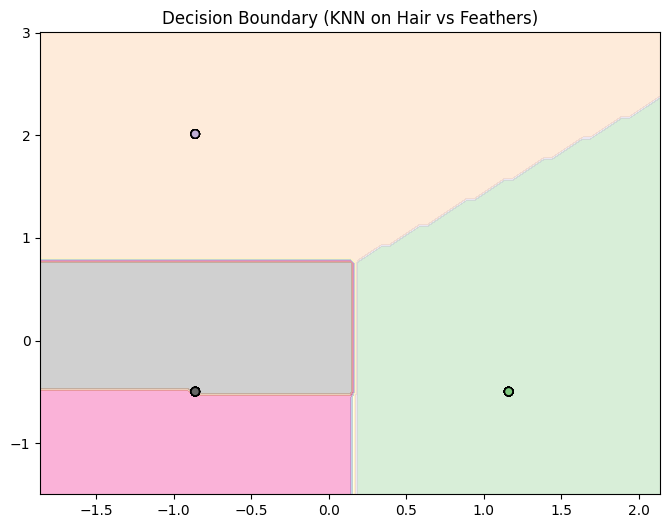

In [ ]:
# Subset with first two features
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

knn_vis = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_vis.fit(X_train_vis, y_train_vis)

# Mesh grid
x_min, x_max = X_vis[:, 0].min()-1, X_vis[:, 0].max()+1
y_min, y_max = X_vis[:, 1].min()-1, X_vis[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Accent")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor="k", cmap="Accent")
plt.title("Decision Boundary (KNN on Hair vs Feathers)")
plt.show()


#Conclusion

The KNN model performed exceptionally well on the Zoo dataset with optimal hyperparameters (K and distance metric). The perfect classification indicates the dataset is well-structured and the features are highly discriminative for animal types. Proper preprocessing, scaling, and hyperparameter tuning contributed to the model’s high performance. This assignment demonstrates how KNN can effectively classify multi-class problems when features are informative and clean.

#Interview Questions
1. Key hyperparameters in KNN:

n_neighbors (K): Number of nearest neighbors to consider. A small K may lead to noisy predictions, while a large K smooths the decision boundary.
Example: K=3 means the class of a sample is decided by the majority among its 3 closest neighbors.

weights: How neighbors contribute to voting. Can be 'uniform' (all neighbors equal) or 'distance' (closer neighbors weigh more).

algorithm: Method to compute nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute').

p: Parameter for Minkowski distance (used if metric='minkowski'). p=1 → Manhattan distance, p=2 → Euclidean distance.

2. Distance metrics in KNN:

Euclidean distance (default, straight-line distance)

Manhattan distance (sum of absolute differences)

Minkowski distance (generalized form of Euclidean & Manhattan)

Hamming distance (useful for categorical/binary features)

Example: For two animals with features [hair, feathers] = [1, 0] and [1, 1],

Euclidean distance = √((1−1)² + (0−1)²) = 1

Manhattan distance = |1−1| + |0−1| = 1

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search for best K and metric
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_knn = grid.best_estimator_

# Evaluate tuned model
y_pred_best = best_knn.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Tuned Accuracy: 1.0


Task 6: Decision Boundary Visualization

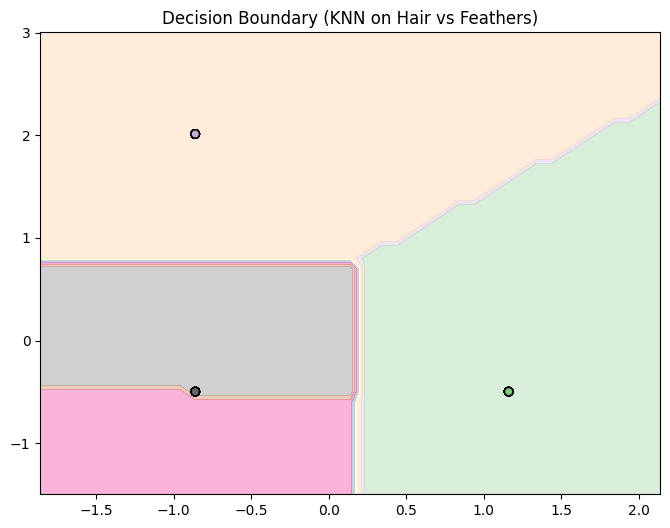

In [ ]:
import numpy as np

# Take first two features (hair, feathers)
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

knn_vis = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_vis.fit(X_train_vis, y_train_vis)

# Mesh grid
x_min, x_max = X_vis[:, 0].min()-1, X_vis[:, 0].max()+1
y_min, y_max = X_vis[:, 1].min()-1, X_vis[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Accent")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor="k", cmap="Accent")
plt.title("Decision Boundary (KNN on Hair vs Feathers)")
plt.show()


#Interview Questions